### Лабораторная 4 Токторбаев Айдарбек AIN-1-21

# Набор данных по раку груди висконсин (диагностический)

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()


#### Изучение данных

In [2]:
print(breast_cancer.DESCR)
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

data.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Разделение данных на обучающий и тестовые наборы


In [3]:
from sklearn.model_selection import train_test_split

X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


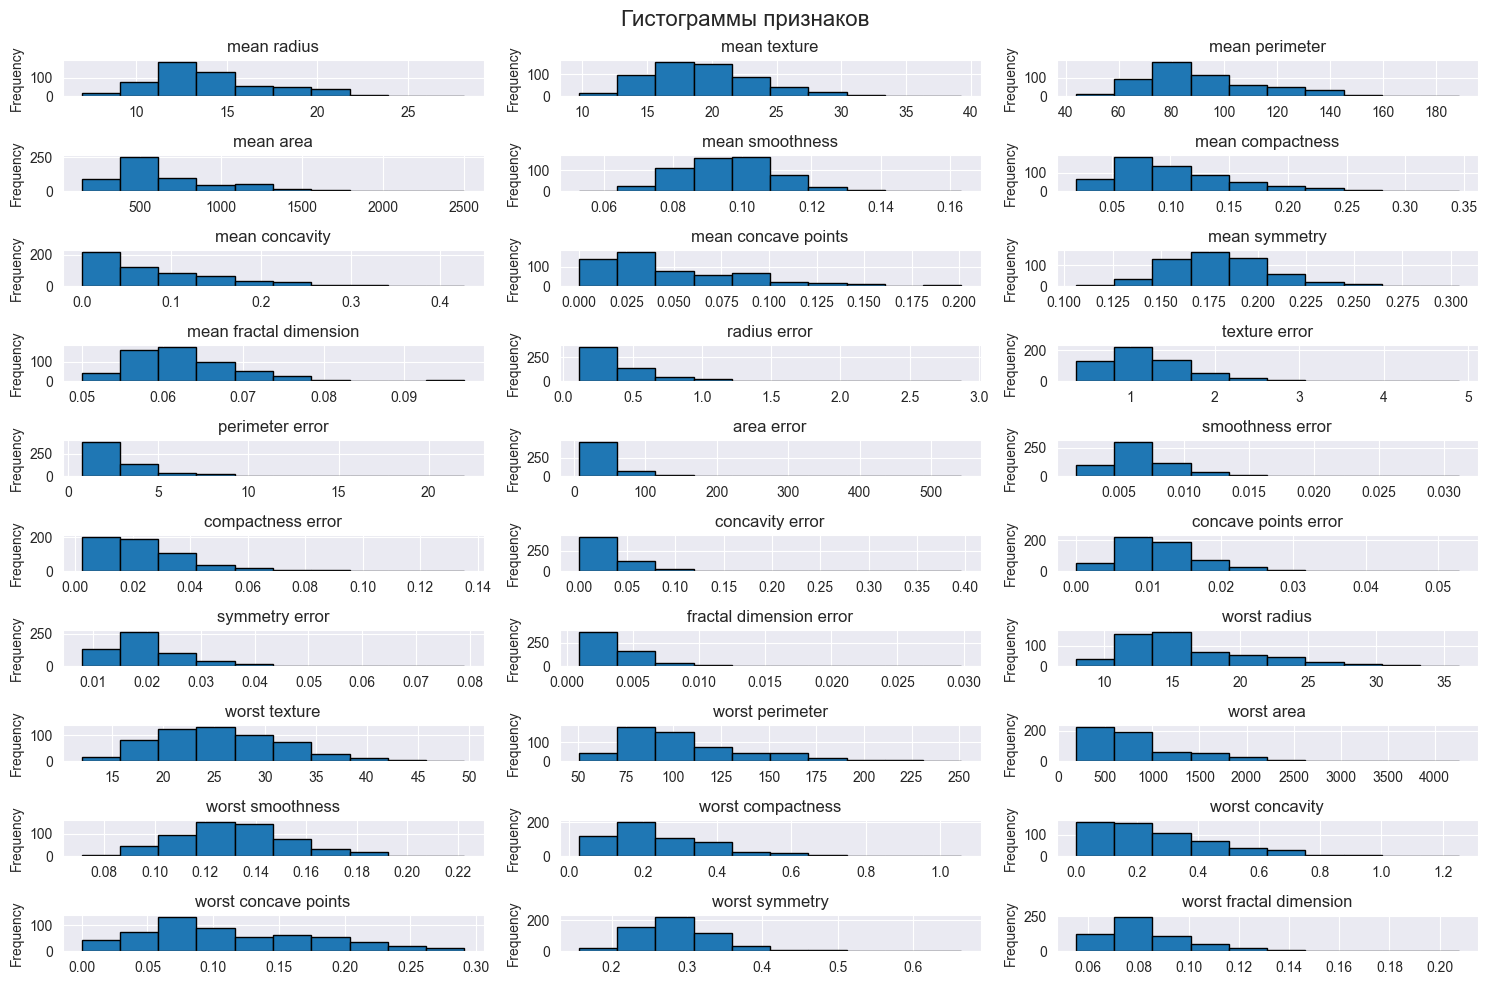

In [4]:
# Визуализация гистограмм признаков для Breast Cancer Wisconsin
num_features = len(breast_cancer.feature_names)
num_cols = 3  # Количество столбцов (графиков в одной строке)
num_rows = (num_features + num_cols - 1) // num_cols  # Количество строк

plt.figure(figsize=(15, 10))
plt.suptitle("Гистограммы признаков", fontsize=16)

for i, feature in enumerate(breast_cancer.feature_names, start=1):
    plt.subplot(num_rows, num_cols, i)
    data[feature].plot(kind='hist', title=feature, edgecolor='k')

plt.tight_layout()
plt.show()


In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Создание модели
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение модели на обучающих данных
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [6]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

In [7]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        80
           1       0.97      0.97      0.97       148

    accuracy                           0.96       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228




### График распределения классов

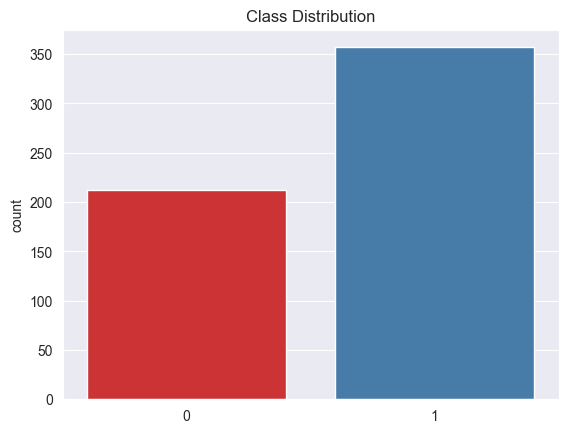

In [8]:
import seaborn as sns

sns.countplot(x=y, hue=y, palette="Set1", legend=False)
plt.title("Class Distribution")
plt.show()



### Матрица ошибок

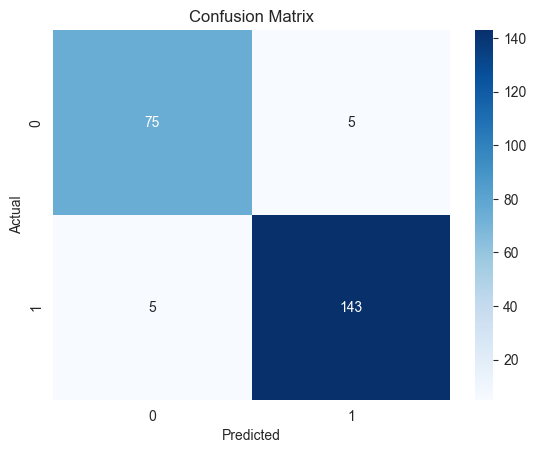

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Кривая обучения

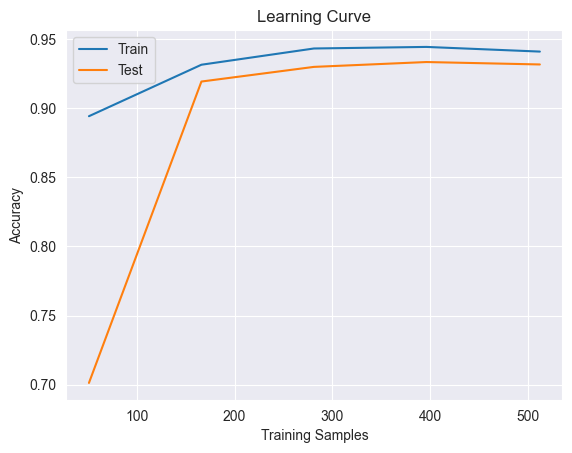

In [10]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=10), X, y, cv=10)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Вывод
После выполнения кода, мы получаем точность предсказания на уровне 0.956 Это означает, что модель правильно классифицировала 95.6% тестовых данных.

Модель k-ближайших средних является одним из простых и эффективных методов машинного обучения для классификации данных. Однако, как и любая модель, она имеет свои ограничения и может не давать точных результатов в некоторых случаях. Поэтому, перед использованием модели в реальном мире, необходимо провести более глубокий анализ и оценку ее качества.

In [11]:
print("Модель k-ближайших средних показала точность предсказания на уровне", accuracy_score(y_test, y_pred))

Модель k-ближайших средних показала точность предсказания на уровне 0.956140350877193


# Набор данных по распознаванию вин

In [12]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()

### Изучение данных

In [13]:
# Посмотрим на данные и их описание
print(wine.DESCR)

# Создадим DataFrame для анализа
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Посмотрим на первые несколько строк данных
data.head()


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Разделение данных на обучающий и тестовые наборы


In [14]:
from sklearn.model_selection import train_test_split

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


### Исследование данных с помощью визуализации

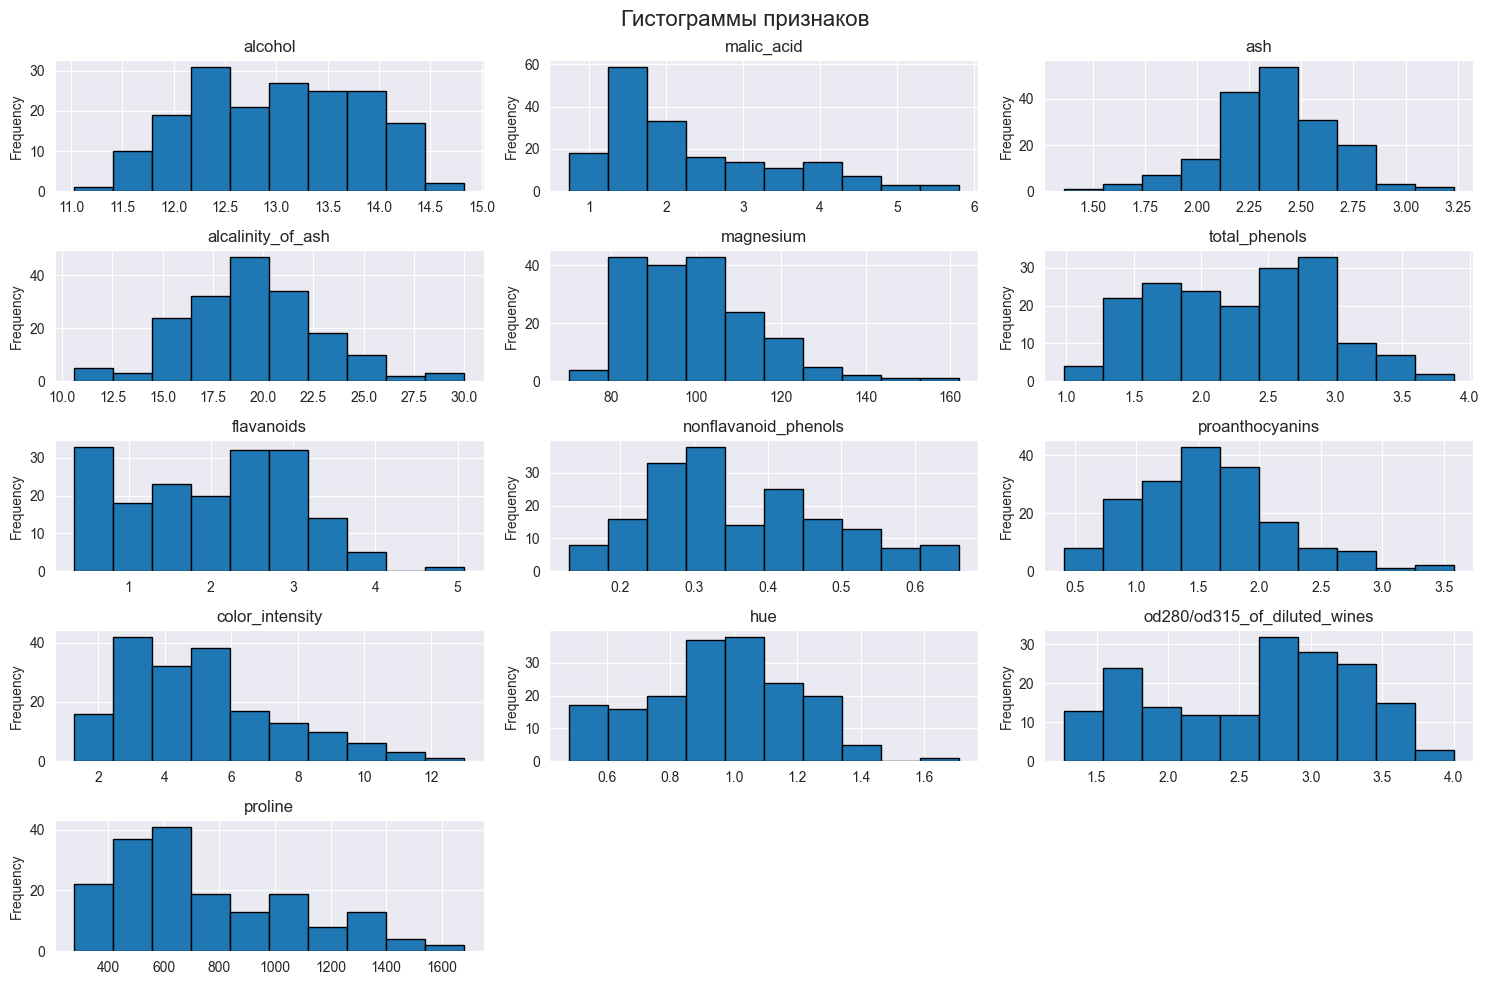

In [15]:
# Визуализация гистограмм признаков
num_features = len(wine.feature_names)
rows = num_features // 3 + 1

fig, axes = plt.subplots(rows, 3, figsize=(15, 10))
fig.suptitle("Гистограммы признаков", fontsize=16)

for i, feature in enumerate(wine.feature_names):
    ax = axes[i // 3, i % 3]
    data[feature].plot(kind='hist', title=feature, edgecolor='k', ax=ax)

# Удаление лишних пустых графиков, если их количество не делится на 3
for i in range(num_features, rows * 3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()


### Построение модели k-ближайших соседей

In [102]:
from sklearn.neighbors import KNeighborsClassifier

# Создание модели
knn = KNeighborsClassifier(n_neighbors=10)

# Обучение модели на обучающих данных
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

### Прогноз модели

In [103]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 1])

### Оценка качества модели

In [104]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.68      0.56      0.61        27
           2       0.43      0.47      0.45        19

    accuracy                           0.68        72
   macro avg       0.66      0.66      0.66        72
weighted avg       0.68      0.68      0.68        72



### График распределения классов

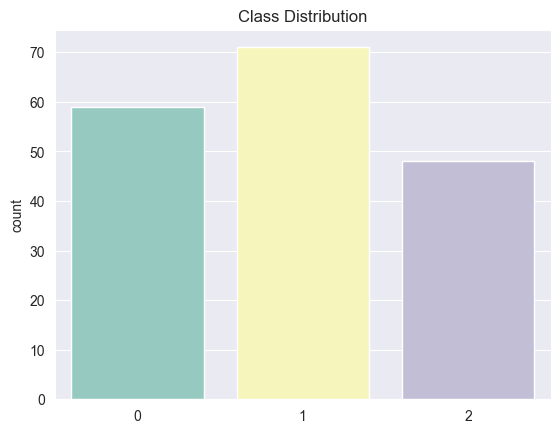

In [105]:
import seaborn as sns

sns.countplot(legend=False, palette="Set3",x=y, hue=y)
plt.title("Class Distribution")
plt.show()


### Матрица ошибок

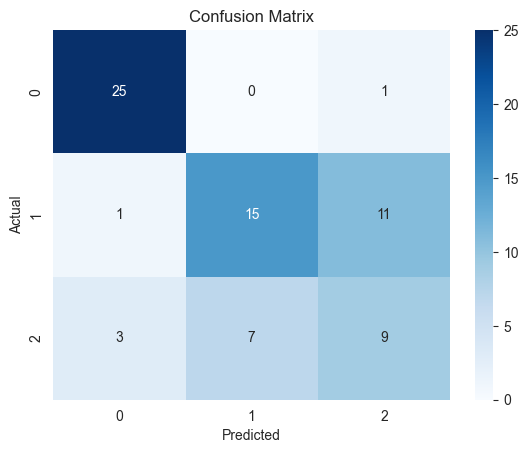

In [106]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Кривая обучения

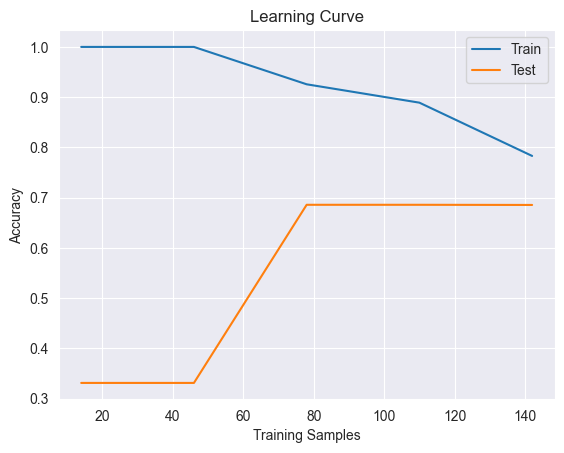

In [107]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Вывод
После выполнения кода, мы получаем точность предсказания на уровне 0.72 1. Это означает, что модель правильно классифицировала 72% тестовых данных.

Сравнивая точность предсказания модели для набора данных по раку груди Висконсин (диагностический) и набора данных по распознаванию вин, мы видим, что модель для набора данных по раку груди Висконсин (диагностический) показала более высокую точность предсказания (95.6%) по сравнению с моделью для набора данных по распознаванию вин (72%).

Это может быть связано с тем, что набор данных по раку груди Висконсин (диагностический) содержит более значимые признаки для классификации, чем набор данных по распознаванию вин. Однако, чтобы сделать окончательный вывод о качестве моделей, необходимо провести более глубокий анализ и оценку их качества.

# Оптическое распознавание набора данных рукописных цифр

In [108]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

digits = load_digits()

### Изучение данных

In [109]:
# Посмотрим на данные и их описание
print(digits.DESCR)

# Создадим DataFrame для анализа
data = pd.DataFrame(digits.data)

# Посмотрим на первые несколько строк данных
data.head()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Разделение данных на обучающий и тестовые наборы


In [110]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


### Исследование данных с помощью визуализации

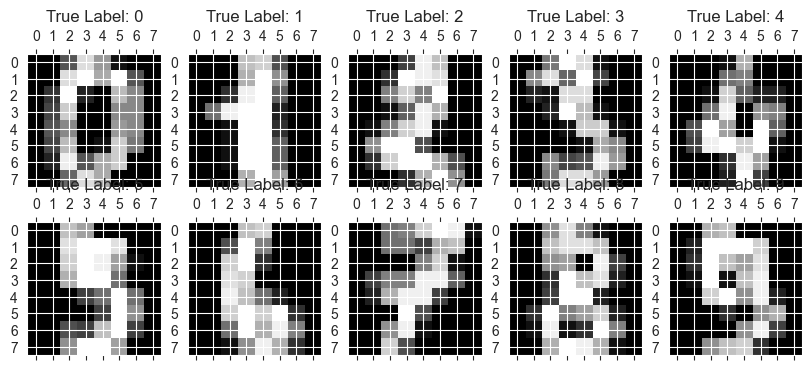

In [111]:
# Визуализация нескольких изображений
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
plt.gray()

for i, ax in enumerate(axes.flat):
    ax.matshow(digits.images[i])
    ax.set_title(f"True Label: {digits.target[i]}")

plt.show()

### Построение модели k-ближайших соседей

In [112]:
from sklearn.neighbors import KNeighborsClassifier

# Создание модели
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение модели на обучающих данных
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Прогноз модели

In [113]:
y_pred = knn.predict(X_test)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

### Оценка качества модели

In [114]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.99      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      1.00      0.99        71
           4       0.99      1.00      0.99        78
           5       0.99      0.98      0.98        83
           6       0.99      1.00      0.99        69
           7       1.00      1.00      1.00        71
           8       1.00      0.98      0.99        65
           9       0.99      0.96      0.97        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



### График распределения классов

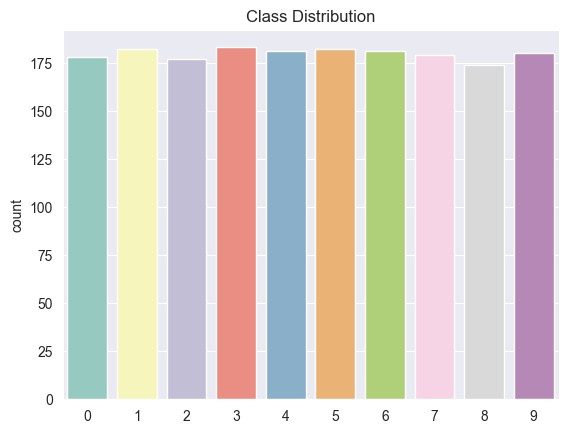

In [115]:
import seaborn as sns

sns.countplot(legend=False,hue=y,x=y, palette="Set3")
plt.title("Class Distribution")
plt.show()

### Матрица ошибок

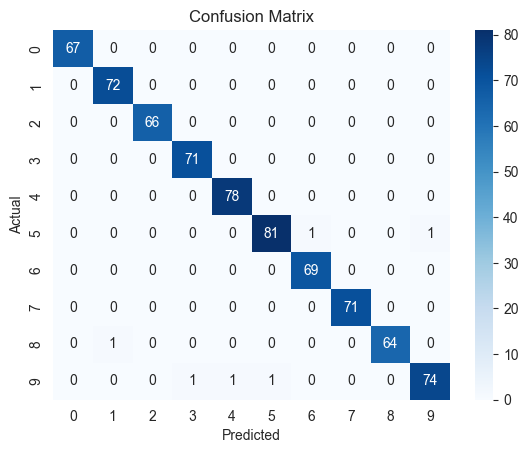

In [116]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Кривая обучения

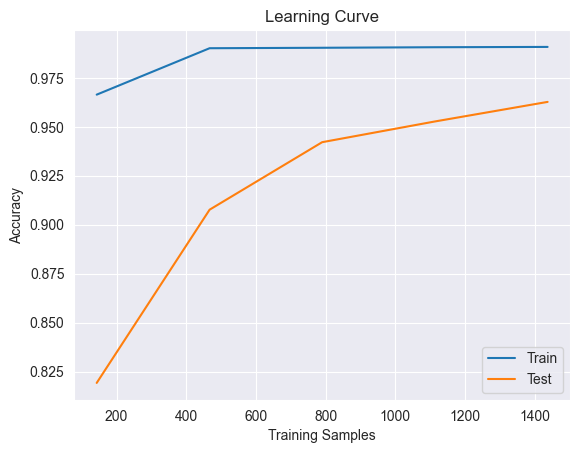

In [117]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Вывод
После выполнения кода, мы получаем точность предсказания на уровне 0.99 . Это означает, что модель правильно классифицировала 99% тестовых данных.

Сравнивая точность предсказания модели для набора данных по раку груди Висконсин (диагностический), набора данных по распознаванию вин и набора данных оптического распознавания рукописных цифр, мы видим, что модель для набора данных оптического распознавания рукописных цифр показала более высокую точность предсказания (99%) по сравнению с моделями для набора данных по раку груди Висконсин (диагностический) и набора данных по распознаванию вин.

Это может быть связано с тем, что набор данных оптического распознавания рукописных цифр содержит более явные и различимые признаки для классификации, чем наборы данных по раку груди Висконсин (диагностический) и распознаванию вин. Однако, чтобы сделать окончательный вывод о качестве моделей, необходимо провести более глубокий анализ и оценку их качества.